In [1]:
!pip install git+https://github.com/huggingface/transformers
!pip install qwen-vl-utils
!pip install openai

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-do0ibbyu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-do0ibbyu
  Resolved https://github.com/huggingface/transformers to commit 84aa13dd85ce5ec2023561ca304c5b41343dd347
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.51.0.dev0-py3-none-any.whl size=11153457 sha256=10697cb45c05921451666e3c459a0bae1304d6947ba5ef969e12bf53723bd2bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-cnj7uwa_/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.50.3
    Uninstalling transformers-4.50.3:
      Successfully uninstalled transformers-4.50.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:

from huggingface_hub import login
from dotenv import load_dotenv
import os


load_dotenv()  # Load environment variables from .env file


hf_token = os.getenv("HF_TOKEN")

login(token=hf_token)


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
!pip install flash-attn --no-build-isolation


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 118.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp310-cp310-linux_x86_64.whl size=187815087 sha256=ffe17686fa1a0f288de9eae7c32af209d32a27b037ef28614f042b377af5b15a
  Stored in directory: /root/.cache/pip/wheels/59/ce/d5/08ea07bfc16ba218dc65a3a7ef9b6a270530bcbd2cea2ee1ca
Successfully built flash-attn


In [2]:
import torch
from transformers import Qwen2_5_VLForConditionalGeneration, AutoProcessor
model_path = "Qwen/Qwen2.5-VL-3B-Instruct"
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(model_path, torch_dtype=torch.bfloat16, attn_implementation="flash_attention_2",device_map="auto")
processor = AutoProcessor.from_pretrained(model_path)

config.json:   0%|          | 0.00/1.37k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [3]:

# Get Noto JP font to display janapese characters
!apt-get install fonts-noto-cjk  # For Noto Sans CJK JP

#!apt-get install fonts-source-han-sans-jp # For Source Han Sans (Japanese)

import json
import random
import io
import ast
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor
import xml.etree.ElementTree as ET

additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]

def decode_xml_points(text):
    try:
        root = ET.fromstring(text)
        num_points = (len(root.attrib) - 1) // 2
        points = []
        for i in range(num_points):
            x = root.attrib.get(f'x{i+1}')
            y = root.attrib.get(f'y{i+1}')
            points.append([x, y])
        alt = root.attrib.get('alt')
        phrase = root.text.strip() if root.text else None
        return {
            "points": points,
            "alt": alt,
            "phrase": phrase
        }
    except Exception as e:
        print(e)
        return None

def plot_bounding_boxes(im, bounding_boxes, input_width, input_height):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        bounding_boxes: A list of bounding boxes containing the name of the object
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # Parsing out the markdown fencing
    bounding_boxes = parse_json(bounding_boxes)

    font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)

    try:
      json_output = ast.literal_eval(bounding_boxes)
    except Exception as e:
      end_idx = bounding_boxes.rfind('"}') + len('"}')
      truncated_text = bounding_boxes[:end_idx] + "]"
      json_output = ast.literal_eval(truncated_text)

    # Iterate over the bounding boxes
    for i, bounding_box in enumerate(json_output):
      # Select a color from the list
      color = colors[i % len(colors)]

      # Convert normalized coordinates to absolute coordinates
      abs_y1 = int(bounding_box["bbox_2d"][1]/input_height * height)
      abs_x1 = int(bounding_box["bbox_2d"][0]/input_width * width)
      abs_y2 = int(bounding_box["bbox_2d"][3]/input_height * height)
      abs_x2 = int(bounding_box["bbox_2d"][2]/input_width * width)

      if abs_x1 > abs_x2:
        abs_x1, abs_x2 = abs_x2, abs_x1

      if abs_y1 > abs_y2:
        abs_y1, abs_y2 = abs_y2, abs_y1

      # Draw the bounding box
      draw.rectangle(
          ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
      )

      # Draw the text
      if "label" in bounding_box:
        draw.text((abs_x1 + 8, abs_y1 + 6), bounding_box["label"], fill=color, font=font)

    # Display the image
    img.show()


def plot_points(im, text, input_width, input_height):
  img = im
  width, height = img.size
  draw = ImageDraw.Draw(img)
  colors = [
    'red', 'green', 'blue', 'yellow', 'orange', 'pink', 'purple', 'brown', 'gray',
    'beige', 'turquoise', 'cyan', 'magenta', 'lime', 'navy', 'maroon', 'teal',
    'olive', 'coral', 'lavender', 'violet', 'gold', 'silver',
  ] + additional_colors
  xml_text = text.replace('```xml', '')
  xml_text = xml_text.replace('```', '')
  data = decode_xml_points(xml_text)
  if data is None:
    img.show()
    return
  points = data['points']
  description = data['phrase']

  font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)

  for i, point in enumerate(points):
    color = colors[i % len(colors)]
    abs_x1 = int(point[0])/input_width * width
    abs_y1 = int(point[1])/input_height * height
    radius = 2
    draw.ellipse([(abs_x1 - radius, abs_y1 - radius), (abs_x1 + radius, abs_y1 + radius)], fill=color)
    draw.text((abs_x1 + 8, abs_y1 + 6), description, fill=color, font=font)
  
  img.show()
  

# @title Parsing JSON output
def parse_json(json_output):
    # Parsing out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-noto-cjk


(640, 426)
Font not found. Falling back to default.


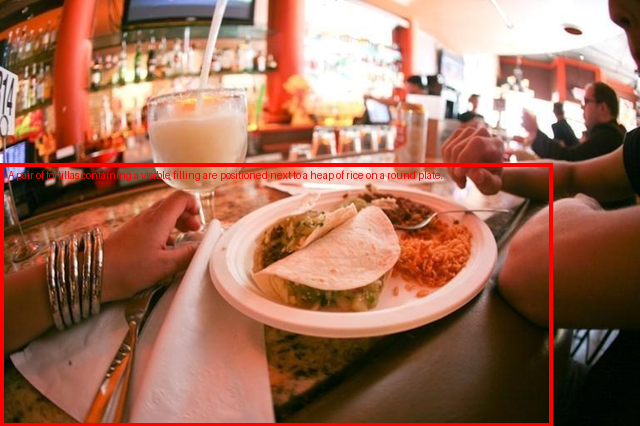

In [13]:

def plot_bounding_boxes(im, bounding_boxes, input_width, input_height):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        bounding_boxes: A list of bounding boxes containing the name of the object
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # Parsing out the markdown fencing
    bounding_boxes = parse_json(bounding_boxes)

    # font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)
    
    try:
        font = ImageFont.truetype("NotoSansCJK-Regular.ttc", size=14)
    except OSError:
        print("Font not found. Falling back to default.")
        font = ImageFont.load_default()

    try:
      json_output = ast.literal_eval(bounding_boxes)
    except Exception as e:
      end_idx = bounding_boxes.rfind('"}') + len('"}')
      truncated_text = bounding_boxes[:end_idx] + "]"
      json_output = ast.literal_eval(truncated_text)

    # Iterate over the bounding boxes
    for i, bounding_box in enumerate(json_output):
      # Select a color from the list
      color = colors[i % len(colors)]

      # Convert normalized coordinates to absolute coordinates
      abs_y1 = int(bounding_box["bbox_2d"][1]/input_height * height)
      abs_x1 = int(bounding_box["bbox_2d"][0]/input_width * width)
      abs_y2 = int(bounding_box["bbox_2d"][3]/input_height * height)
      abs_x2 = int(bounding_box["bbox_2d"][2]/input_width * width)

      if abs_x1 > abs_x2:
        abs_x1, abs_x2 = abs_x2, abs_x1

      if abs_y1 > abs_y2:
        abs_y1, abs_y2 = abs_y2, abs_y1

      # Draw the bounding box
      draw.rectangle(
          ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
      )

      # Draw the text
      if "label" in bounding_box:
        draw.text((abs_x1 + 8, abs_y1 + 6), bounding_box["label"], fill=color, font=font)

    # Display the image
    img.show()


plot_bounding_boxes(image,response,input_width,input_height)

In [4]:
def inference(img_url, prompt, system_prompt="You are a helpful assistant", max_new_tokens=1024):
  image = Image_PIL.open(img_url)
  messages = [
    {
      "role": "system",
      "content": system_prompt
    },
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": prompt
        },
        {
          "image": img_url
        }
      ]
    }
  ]
  text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
  print("input:\n",text)
  inputs = processor(text=[text], images=[image], padding=True, return_tensors="pt").to('cuda')


  # Patch if missing
  if "image_grid_thw" not in inputs:
      inputs["image_grid_thw"] = torch.tensor([[14, 14, 1]], device='cuda')
      
  with torch.no_grad():

    output_ids = model.generate(**inputs, max_new_tokens=1024)
  
  generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(inputs.input_ids, output_ids)]
  output_text = processor.batch_decode(generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True)
  print("output:\n",output_text[0])

  input_height = inputs['image_grid_thw'][0][1]*14
  input_width = inputs['image_grid_thw'][0][2]*14

  return output_text[0], input_height, input_width

In [5]:
import os
import io
import pandas as pd
from PIL import Image as Image_PIL
import shutil
from datasets import load_dataset, Dataset, Image
from tqdm import tqdm
from huggingface_hub import login
from dotenv import load_dotenv
import os

load_dotenv()  # Load environment variables from .env file


# --- Configuration ---

hf_token = os.getenv("HF_TOKEN")

hf_user = "Rajarshi-Roy-research"
# dataset_name = "Flickr30k_Grounding_Som"
# commit_message = "Updating dataset with image paths"
# img_cols = ["image","wbox_image"]
# image_to_process = "image"

dataset_name = "refcocog-eval-depth"
commit_message = "Updating dataset with images and depth caption"
img_cols = ["image"]
image_to_process = "image"

# --- Helper Functions ---
def save_image_from_bytes(image_data, idx, image_folder):
    """Saves an image from byte data and returns the saved file path."""
    try:
        image_bytes = image_data.get("bytes", None)
        if image_bytes:
            image = Image_PIL.open(io.BytesIO(image_bytes))
            image_path = os.path.join(image_folder, f"image_{idx}.jpg")
            image.save(image_path, format="JPEG")
            print(f"✅ Saved: {image_path}")
            return image_path
        else:
            print(f"⚠️ Skipped row {idx}: No bytes found")
            return None
    except Exception as e:
        print(f"❌ Error saving image at row {idx}: {e}")
        return None


# --- Main Script ---
# Clean up existing image folder
for img_col in img_cols:
    if os.path.exists(img_col):
        shutil.rmtree(img_col)
    os.makedirs(img_col)

# Load dataset
ds = load_dataset(f"{hf_user}/{dataset_name}")
df = ds["train"].to_pandas()

for img_col in img_cols:
    # Save images and update DataFrame
    for i, row in df.iterrows():
        if isinstance(row[img_col], dict):
            df.at[i, img_col] = save_image_from_bytes(row[img_col], i, img_col)



README.md:   0%|          | 0.00/753 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/60.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

✅ Saved: image/image_0.jpg
✅ Saved: image/image_1.jpg
✅ Saved: image/image_2.jpg
✅ Saved: image/image_3.jpg
✅ Saved: image/image_4.jpg
✅ Saved: image/image_5.jpg
✅ Saved: image/image_6.jpg
✅ Saved: image/image_7.jpg
✅ Saved: image/image_8.jpg
✅ Saved: image/image_9.jpg
✅ Saved: image/image_10.jpg
✅ Saved: image/image_11.jpg
✅ Saved: image/image_12.jpg
✅ Saved: image/image_13.jpg
✅ Saved: image/image_14.jpg
✅ Saved: image/image_15.jpg
✅ Saved: image/image_16.jpg
✅ Saved: image/image_17.jpg
✅ Saved: image/image_18.jpg
✅ Saved: image/image_19.jpg
✅ Saved: image/image_20.jpg
✅ Saved: image/image_21.jpg
✅ Saved: image/image_22.jpg
✅ Saved: image/image_23.jpg
✅ Saved: image/image_24.jpg
✅ Saved: image/image_25.jpg
✅ Saved: image/image_26.jpg
✅ Saved: image/image_27.jpg
✅ Saved: image/image_28.jpg
✅ Saved: image/image_29.jpg
✅ Saved: image/image_30.jpg
✅ Saved: image/image_31.jpg
✅ Saved: image/image_32.jpg
✅ Saved: image/image_33.jpg
✅ Saved: image/image_34.jpg
✅ Saved: image/image_35.jpg
✅ 

In [6]:
df

,id,caption,bbox,bbox_area,bbox_id,ori_category_id,image_id,height,width,file_name,is_rewrite,split,image,depth_caption
0,4381,A pair of tortillas containing a visible filli...,[300.25585936 239.42510986 183.92150884 133.25...,24508.697297,o365_24196196,o365_172,o365_489077,512,769,sampled_images/objects365_v1_00489077.jpg,True,val,image/image_0.jpg,Closest: a couple\n----\nMid Range: a bar\n---...
1,3385,"The closed-top, white bucket-shaped item, posi...",[647.26123049 556.64379886 98.25061038 106.61...,10474.736003,o365_3289057,o365_49,o365_1040341,768,1024,sampled_images/objects365_v2_01040341.jpg,True,val,image/image_1.jpg,Closest: a man\n----\nMid Range: tents\n----\n...
2,27674,The pink and white surfboard is curretnly ride...,[120.05 163.64 232.97 77.18],17980.624600,coco_650459,refcoco_42,coco_449136,318,640,sampled_images/COCO_train2014_000000449136.jpg,True,val,image/image_2.jpg,Closest: a man\n----\nMid Range: a surfer\n---...
3,44294,"The man wearing a cheerful Santa hat, characte...",[240.81 14.21 275.38 370.15],101931.907000,coco_2165449,refcoco_1,coco_242583,427,640,sampled_images/COCO_train2014_000000242583.jpg,True,val,image/image_3.jpg,Closest: a man\n----\nMid Range: a hand\n----\...
4,29717,The pizza adorned with chunks of white topping...,[143.32 283.76 353.97 139.47],49368.195900,coco_1074038,refcoco_59,coco_70415,429,640,sampled_images/COCO_train2014_000000070415.jpg,False,val,image/image_4.jpg,Closest: a pizza\n----\nMid Range: a person\n-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12011,The green purse hanging on the wall close to t...,[232.43835453 416.28540035 57.75231928 61.99...,3580.129160,o365_27275769,o365_14,o365_2053317,982,1024,sampled_images/objects365_v2_02053317.jpg,True,val,image/image_395.jpg,Closest: two motorcycles\n----\nMid Range: a m...
396,36631,"The man standing in the background, behind the...",[363.87 211.18 116.49 306.33],35684.381700,coco_500529,refcoco_1,coco_242213,640,512,sampled_images/COCO_train2014_000000242213.jpg,False,val,image/image_396.jpg,Closest: a baseball pitcher\n----\nMid Range: ...
397,18231,The skier clad in a red jacket is standing wit...,[474.02 105.55 130.5 316.65],41322.825000,coco_512212,refcoco_1,coco_271641,427,640,sampled_images/COCO_train2014_000000271641.jpg,False,val,image/image_397.jpg,Closest: people\n----\nMid Range: a silhouette...
398,5846,A transparent drinking vessel containing a yel...,[284.04260255 188.13116452 100.05944822 199.01...,19913.766167,o365_9095135,o365_11,o365_476705,683,512,sampled_images/objects365_v1_00476705.jpg,False,val,image/image_398.jpg,Closest: candles\n----\nMid Range: a plate of ...


In [7]:
df["image"][0]

'image/image_0.jpg'

In [22]:

# response

NameError: name 'response' is not defined

In [ ]:
inputs = processor(text=[text], images=[image], padding=True, return_tensors="pt").to("cuda")

# Patch if missing
if "image_grid_thw" not in inputs:
    inputs["image_grid_thw"] = torch.tensor([[14, 14, 1]], device='cuda')

with torch.no_grad():
    output_ids = model.generate(**inputs, max_new_tokens=1024)


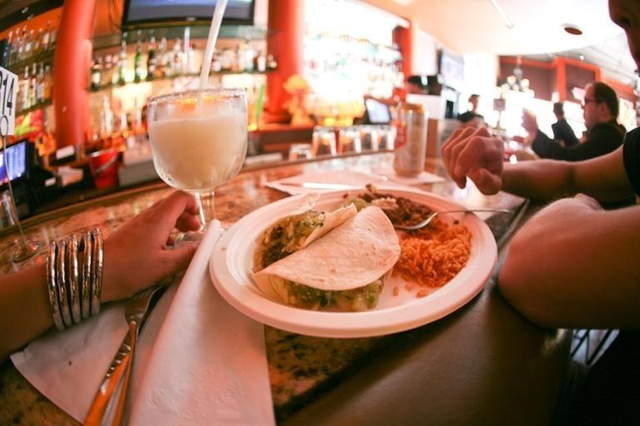

In [11]:
image

In [ ]:
idx = 0

image_path = df["image"][idx]


## Use a local HuggingFace model to inference.
# prompt in chinese
prompt = "框出每一个小蛋糕的位置，以json格式输出所有的坐标"
# prompt in english
prompt = "Outline the position of each small cake and output all the coordinates in JSON format."

prompt = f"""Outline the position of:\n {df["caption"][idx]}\nand output all the coordinates in JSON format."""
response, input_height, input_width = inference(image_path, prompt)

image = Image_PIL.open(image_path)
print(image.size)
image.thumbnail([640,640], Image_PIL.Resampling.LANCZOS)

plot_bounding_boxes(image,response,input_width,input_height)




input:
 <|im_start|>system
You are a helpful assistant<|im_end|>
<|im_start|>user
Outline the position of:
 A pair of tortillas containing a visible filling are positioned next to a heap of rice on a round plate.
and output all the coordinates in JSON format.<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant



output:
 ```json
[
	{"bbox_2d": [0, 194, 653, 504], "label": "A pair of tortillas containing a visible filling are positioned next to a heap of rice on a round plate."}
]
```
(769, 512)
(640, 426)


OSError: cannot open resource